In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#installing a library to read the xlsx/xlsm file
!pip install openpyxl

In [3]:
#load the datset from excel file to df(dataframe)
df = pd.read_excel("C:/Users/HP/Downloads/Healtcare-Dataset.xlsx")
df.head()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06,4.9,4567,4110.3


In [4]:
#getting an idea about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7035 non-null   datetime64[ns]
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 615.2+ KB


In [5]:
df['Health Insurance Amount'].value_counts() # checking whether a 'Health Insurance Amount' coloumn is in float datatype

Health Insurance Amount
11107.8    245
2108.7     238
3081.6     234
4110.3     119
5808.6     119
          ... 
8356.5      10
51915.6      9
76287.6      9
86280.3      9
85078.8      9
Name: count, Length: 103, dtype: int64

In [6]:
#checking Null Values in the data
df.isnull().sum().any()

True

In [7]:
#True means Null values exist in the Data

In [8]:
#checking in which coloumn NUll Value exist
df.isnull().sum()


Patient_ID                   0
Admit_Date                   0
Discharge_Date               0
Diagnosis                    0
Bed_Occupancy                0
Test                         0
Doctor                       0
Followup Date              122
Feedback                     0
Billing Amount               0
Health Insurance Amount      0
dtype: int64

In [9]:
#We found there are 122 Null values in the Coloumn - 'Followup Date'

In [10]:
# Handling missing values in 'Followup Date'
# Replace missing values with 'No Follow-up Required'
df['Followup Date'].fillna('No Follow-up Required',inplace = True)
print("Checking the Missing Values after handling \n")
print(df.isnull().sum())

Checking the Missing Values after handling 

Patient_ID                 0
Admit_Date                 0
Discharge_Date             0
Diagnosis                  0
Bed_Occupancy              0
Test                       0
Doctor                     0
Followup Date              0
Feedback                   0
Billing Amount             0
Health Insurance Amount    0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_2820\2922955646.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Followup Date'].fillna('No Follow-up Required',inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2820\2922955646.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Follow-up Required' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['Followup Date'].fillna('No Follow-up Re

In [11]:
#checking Duplicates values in Data
df.duplicated().sum()

0

In [12]:
#identifying rows where Discharge_Date is earlier than Admit_Date
invalid_dates = df[df['Discharge_Date'] < df['Admit_Date']]
print(invalid_dates)

Empty DataFrame
Columns: [Patient_ID, Admit_Date, Discharge_Date, Diagnosis, Bed_Occupancy, Test, Doctor, Followup Date, Feedback, Billing Amount, Health Insurance Amount]
Index: []


In [13]:
print(f"\nNumber of inconsistent rows: {len(invalid_dates)}")


Number of inconsistent rows: 0


In [14]:
#Then the dataset doesnt consist of inconsistent rows

In [15]:
df.describe()

,Patient_ID,Admit_Date,Discharge_Date,Feedback,Billing Amount,Health Insurance Amount
count,7157.000000,7157,7157,7157.000000,7157.000000,7157.000000
mean,27149.000000,2023-07-24 09:14:42.772111360,2023-08-01 15:14:27.681989376,4.723543,26607.891854,23947.102669
min,23571.000000,2022-12-05 00:00:00,2023-01-12 00:00:00,3.500000,1223.000000,1100.700000
25%,25360.000000,2023-04-03 00:00:00,2023-04-11 00:00:00,4.500000,5454.000000,4908.600000
50%,27149.000000,2023-07-22 00:00:00,2023-07-31 00:00:00,5.000000,12348.000000,11113.200000
75%,28938.000000,2023-11-11 00:00:00,2023-11-20 00:00:00,5.000000,43522.000000,39169.800000
max,30727.000000,2024-03-06 00:00:00,2024-03-07 00:00:00,5.000000,95867.000000,86280.300000
std,2066.192271,NaN,NaN,0.479901,25791.931009,23212.737908


In [16]:
#calculate the InterQuartile Range (IQR) for 'Billing Amount'
# Q1 (25th percentile) and Q3 (75th percentile) are calculated to find the middle 50% of the data
Q1_billing = df['Billing Amount'].quantile(0.25) # first quartile(25% of the data falls below the value)
Q3_billing = df['Billing Amount'].quantile(0.75) #third quartile (75% of the data falls below this value)
IQR_billing = Q3_billing - Q1_billing #IQR is the range of the middle 50% of the data

#Define lower and upper bounds for identifying outliers
#values smaller than this lower bound or larger than this upper bound considered as outliers
lower_bound_billing = Q1_billing - 1.5 * IQR_billing #Minimum threshold for valid values
upper_bound_billing = Q3_billing + 1.5 * IQR_billing #Maximum threshold for valid values

#identifying outliers in 'Billing Amount'
#Filter rows where the 'Billing Amount' is outside the valid range
outliers_billing = df[(df['Billing Amount'] < lower_bound_billing) | (df['Billing Amount']>upper_bound_billing)]

#we are repeating same process for coloumn 'Health Insurance Amount'
#calculating Q1,Q3,IQR
Q1_insurance  = df['Health Insurance Amount'].quantile(0.25) 
Q3_insurance = df['Health Insurance Amount'].quantile(0.75)
IQR_insurance = Q3_insurance - Q1_insurance #IQR for "Health Insurance Amount'

#define lower and upper bounds for 'Health Inusrance Amount'
lower_bound_insurance = Q1_insurance - 1.5 * IQR_insurance
upper_bound_insurance = Q3_insurance + 1.5 * IQR_insurance

#identifying outliers in 'Health Insurance Amount'
outliers_insurance = df[(df['Health Insurance Amount']<lower_bound_insurance) | (df['Health Insurance Amount'] > upper_bound_insurance)]

#printing results as
print(f"Number of Outliers in 'Billing Amount' : {len(outliers_billing)}")
print(f"Number of outliers in 'Health Insurance Amount' : {len(outliers_insurance)}") 


Number of Outliers in 'Billing Amount' : 0
Number of outliers in 'Health Insurance Amount' : 0


In [17]:
 #save the cleaned dataset to a New File
cleaned_file_path = "Cleaned_Healthcare_Dataset.xlsx"
df.to_excel(cleaned_file_path,index = False)
print(f"\n Cleaned dataset saved as '{cleaned_file_path}'")


 Cleaned dataset saved as 'Cleaned_Healthcare_Dataset.xlsx'


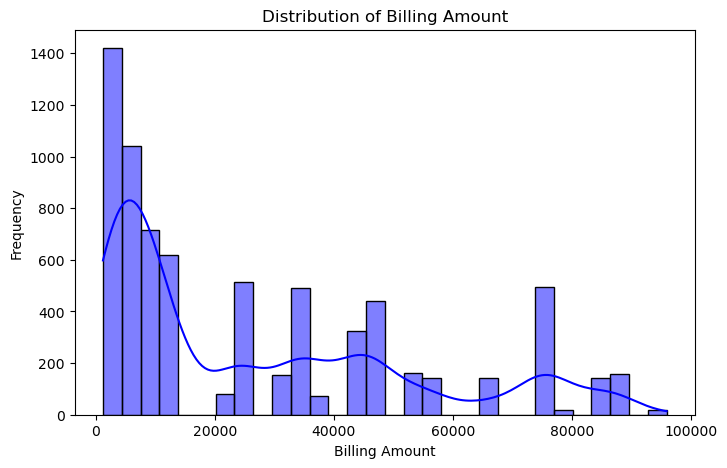

In [18]:
#importing important libraries
import matplotlib.pyplot as plt
import seaborn as sns

#plot the distribution of 'Billing Amount'
plt.figure(figsize=(8,5))
sns.histplot(df['Billing Amount'],bins=30,kde=True,color='blue')
plt.title("Distribution of Billing Amount")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()

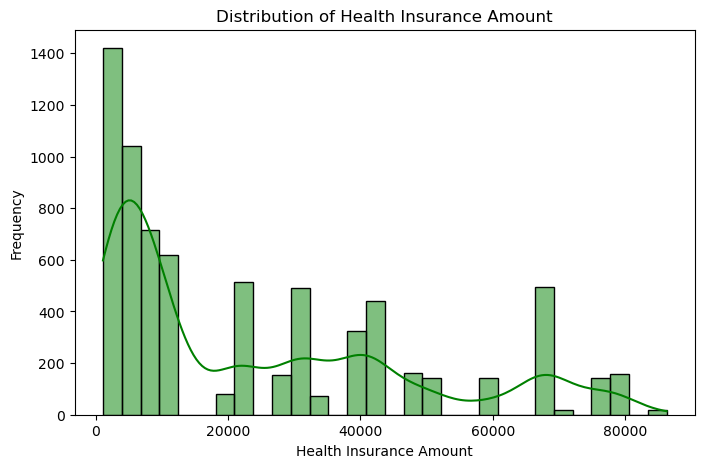

In [19]:
#Plot the distribution of 'Health Insurance Amount'
plt.figure(figsize=(8,5))
sns.histplot(df['Health Insurance Amount'],bins=30,kde=True,color='green')
plt.title("Distribution of Health Insurance Amount")
plt.xlabel("Health Insurance Amount")
plt.ylabel("Frequency")
plt.show()

In [20]:
 # Database Integration with MYSQL,here Installing Mysql-connector library
!pip install mysql-connector-python

In [21]:
#MYSQL Integration and Execution
import mysql.connector
import pandas as pd

#Connecting to MYSQL server
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database= "healthcare_db"
    
)

cursor = connection.cursor()

In [22]:
#connect to the newly created database
connection = mysql.connector.connect(
    host="localhost",
   user="root",
    password="root",
    database="healthcare_db"
)
cursor = connection.cursor()

#Create a table in the DATABASE
cursor.execute("""
CREATE TABLE IF NOT EXISTS healthcare_data (
    Patient_ID INT PRIMARY KEY,
    Admit_Date DATE,
    Discharge_Date DATE,
    Diagnosis VARCHAR(260),
    Bed_Occupancy VARCHAR(50),
    Test VARCHAR(100),
    Doctor VARCHAR(100),
    Followup_Date VARCHAR(50),
    Feedback FLOAT,
    Billing_Amount FLOAT,
    Health_Insurance_Amount FLOAT
)
""")

print("Table 'healthcare_date' created or already exists")




Table 'healthcare_date' created or already exists


In [23]:
# Load Data in to Table
#Read the cleaned dataset
df_cleaned = pd.read_excel("Cleaned_Healthcare_Dataset.xlsx")
try:
    #Insert data into the table
    print("Inserting data into the table")
    for index,row in df_cleaned.iterrows():
        #Converting the row into a tuple and insert it into the database
        sql_query = """
        INSERT INTO healthcare_data (
            Patient_ID, Admit_Date, Discharge_Date, Diagnosis, Bed_Occupancy,
            Test, Doctor, Followup_Date, Feedback, Billing_Amount, Health_Insurance_Amount
        )VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s  )
        """
        cursor.execute(sql_query,tuple(row))
    
    #commit changes to save the data into the table
    connection.commit()
    print("Data successfully loaded into 'healthcare_data' table")

except:
    pass
    
    




Inserting data into the table


In [24]:
#  Execute Queries and Displaying Results
def execute_query(query,description):
    print(f"\n{description}")
    cursor.execute(query)
    result = cursor.fetchall()
    for row in result:
        print(row)

#Query 1: Montly Admission Trends
execute_query("""
SELECT DATE_FORMAT(Admit_Date,'%Y-%m') AS Month, COUNT(*) AS Total_Admission
FROM healthcare_data
GROUP BY Month
ORDER BY Month;
""","Monthly Admission Trends:")


Monthly Admission Trends:
('2022-12', 61)
('2023-01', 590)
('2023-02', 497)
('2023-03', 609)
('2023-04', 493)
('2023-05', 509)
('2023-06', 466)
('2023-07', 505)
('2023-08', 513)
('2023-09', 458)
('2023-10', 501)
('2023-11', 472)
('2023-12', 526)
('2024-01', 501)
('2024-02', 417)
('2024-03', 39)


In [25]:
#Query 2 : Top  5 Diagnosis
execute_query("""
SELECT Diagnosis, COUNT(*) AS Frequency
FROM healthcare_data
GROUP BY Diagnosis
ORDER BY Frequency DESC
LIMIT 5;
""","Top 5 Diagnosis:")



Top 5 Diagnosis:
('Viral Infection ', 2004)
('Flu', 1717)
('Malaria ', 1431)
('Typhoid', 1145)
('Pneumonia ', 573)


In [26]:
#Query 3:Bed occupancy Distribution
execute_query("""
SELECT Bed_Occupancy,COUNT(*) AS Count
FROM healthcare_data
GROUP BY Bed_Occupancy;
""", "Distribution of Bed Occupancy Types:")


Distribution of Bed Occupancy Types:
('General', 2385)
('Private', 3579)
('ICU', 1193)


In [27]:
#Query 4: Average and Maximum Length of Stay
execute_query("""
SELECT Diagnosis,
       AVG(DATEDIFF(Discharge_Date, Admit_Date)) AS Avg_Stay,
       MAX(DATEDIFF(Discharge_Date, Admit_Date)) AS Max_Stay
FROM healthcare_data
GROUP BY Diagnosis
ORDER BY Avg_Stay DESC;
""","Average and Maximum Length of Stay by Diagnosis:")


Average and Maximum Length of Stay by Diagnosis:
('Malaria ', Decimal('8.4375'), 45)
('Viral Infection ', Decimal('8.4122'), 45)
('Fracture', Decimal('8.3449'), 45)
('Typhoid', Decimal('8.0961'), 45)
('Flu', Decimal('8.0798'), 45)
('Pneumonia ', Decimal('7.9825'), 45)


In [28]:
#Query 5: Seasonal Admission Patterns
execute_query("""
SELECT MONTHNAME(Admit_Date) AS Month, COUNT(*) AS Total_Admissions
FROM healthcare_data
GROUP BY Month
ORDER BY FIELD(Month,'January', 'February', 'March', 'April', 'May', 'June', 'July',
                      'August', 'September', 'October', 'November', 'December')
""","Seasonal Admission Patterns:")


Seasonal Admission Patterns:
('January', 1091)
('February', 914)
('March', 648)
('April', 493)
('May', 509)
('June', 466)
('July', 505)
('August', 513)
('September', 458)
('October', 501)
('November', 472)
('December', 587)


In [29]:
#Query 6 : Total Number of pateints handled by the doctor
execute_query("""
SELECT DOCTOR,COUNT(*) AS Patient_Count
FROM healthcare_data
GROUP BY Doctor
ORDER BY Patient_Count DESC;
""","Total Number of Patients Handled by Each Doctor:")


Total Number of Patients Handled by Each Doctor:
('Jay Sinha', 1023)
('Mark Joy', 1023)
('Jaya Yaadav', 1023)
('Niki Sharma', 1022)
('Tejas Saxena', 1022)
('Naresh Goyenka', 1022)
('Ravi D', 1022)


In [30]:
#Query 7: Popular Test
execute_query("""
SELECT Test, COUNT(*) AS Test_Count
FROM healthcare_data
GROUP BY Test
ORDER BY Test_Count DESC
LIMIT 5;
""","Most Popular Tests:")


Most Popular Tests:
('Blood Test', 2236)
('MRI', 1789)
('CT Scan', 1342)
('X-Ray', 895)
('Ultrasound', 895)


In [31]:
#Query 8: Total revenue by diagnosis
execute_query("""
SELECT Diagnosis, SUM(Billing_Amount) AS Total_Revenue
FROM healthcare_data
GROUP BY Diagnosis
ORDER BY Total_Revenue DESC;
""","Total_Revenue by Diagnosis:")


Total_Revenue by Diagnosis:
('Viral Infection ', 53416273.0)
('Flu', 45877520.0)
('Malaria ', 38006041.0)
('Typhoid', 30352736.0)
('Pneumonia ', 15216159.0)
('Fracture', 7563953.0)


In [32]:
# Query 9 : Patient Count by Month and Bed Type
execute_query("""
SELECT DATE_FORMAT(Admit_Date, '%Y-%m') AS Month, 
       Bed_Occupancy, 
       COUNT(*) AS Patient_Count
FROM healthcare_data
GROUP BY Month, Bed_Occupancy
ORDER BY Month, Patient_Count DESC;
""", "Patient Count by Month and Bed Type:")



Patient Count by Month and Bed Type:
('2022-12', 'Private', 30)
('2022-12', 'General', 20)
('2022-12', 'ICU', 11)
('2023-01', 'Private', 295)
('2023-01', 'General', 197)
('2023-01', 'ICU', 98)
('2023-02', 'Private', 249)
('2023-02', 'General', 165)
('2023-02', 'ICU', 83)
('2023-03', 'Private', 305)
('2023-03', 'General', 203)
('2023-03', 'ICU', 101)
('2023-04', 'Private', 246)
('2023-04', 'General', 165)
('2023-04', 'ICU', 82)
('2023-05', 'Private', 255)
('2023-05', 'General', 169)
('2023-05', 'ICU', 85)
('2023-06', 'Private', 232)
('2023-06', 'General', 156)
('2023-06', 'ICU', 78)
('2023-07', 'Private', 253)
('2023-07', 'General', 168)
('2023-07', 'ICU', 84)
('2023-08', 'Private', 256)
('2023-08', 'General', 171)
('2023-08', 'ICU', 86)
('2023-09', 'Private', 229)
('2023-09', 'General', 153)
('2023-09', 'ICU', 76)
('2023-10', 'Private', 251)
('2023-10', 'General', 167)
('2023-10', 'ICU', 83)
('2023-11', 'Private', 236)
('2023-11', 'General', 157)
('2023-11', 'ICU', 79)
('2023-12', 'Pr

In [33]:
# Query 10: Diagnosis Revenue Contribution
execute_query("""
SELECT Diagnosis, 
       SUM(Billing_Amount) AS Total_Revenue,
       COUNT(*) AS Patient_Count
FROM healthcare_data
GROUP BY Diagnosis
ORDER BY Total_Revenue DESC
LIMIT 5;
""", "Top 5 Diagnoses by Revenue Contribution:")



Top 5 Diagnoses by Revenue Contribution:
('Viral Infection ', 53416273.0, 2004)
('Flu', 45877520.0, 1717)
('Malaria ', 38006041.0, 1431)
('Typhoid', 30352736.0, 1145)
('Pneumonia ', 15216159.0, 573)


In [34]:
# Query 11: Total Revenue by Month
execute_query("""
SELECT DATE_FORMAT(Admit_Date, '%Y-%m') AS Month, SUM(Billing_Amount) AS Total_Revenue
FROM healthcare_data
GROUP BY Month
ORDER BY Month;
""","Monthly Revenue Trends:")


Monthly Revenue Trends:
('2022-12', 1613162.0)
('2023-01', 15712160.0)
('2023-02', 13198088.0)
('2023-03', 16213144.0)
('2023-04', 13325323.0)
('2023-05', 13447264.0)
('2023-06', 12485466.0)
('2023-07', 13378735.0)
('2023-08', 13697418.0)
('2023-09', 12189231.0)
('2023-10', 13169852.0)
('2023-11', 12844610.0)
('2023-12', 13843916.0)
('2024-01', 13327092.0)
('2024-02', 10873389.0)
('2024-03', 1113832.0)


In [35]:
#Query 12: Diagnosis with the Highest Feedback
execute_query("""
SELECT Diagnosis, AVG(Feedback) AS Avg_Feedback
FROM healthcare_data
GROUP BY Diagnosis
ORDER BY Avg_Feedback DESC
LIMIT 5;
""", "Diagnosis with the Highest Feedback:")


Diagnosis with the Highest Feedback:
('Fracture', 4.727177717959839)
('Viral Infection ', 4.725349318005605)
('Typhoid', 4.725240191413846)
('Pneumonia ', 4.724607346985769)
('Flu', 4.721549230463364)


In [36]:
#Query 13: Doctors with the most patients
execute_query("""
SELECT Doctor, COUNT(*) AS Patient_Count
FROM healthcare_data
GROUP BY Doctor
ORDER BY Patient_Count DESC
LIMIT 5;
"""," Doctors with Most Patients:")


 Doctors with Most Patients:
('Jay Sinha', 1023)
('Jaya Yaadav', 1023)
('Mark Joy', 1023)
('Niki Sharma', 1022)
('Tejas Saxena', 1022)


In [37]:
#Query 14: Patients without Follow-up
execute_query("""
SELECT COUNT(*) AS N0_Followup_Patients
FROM healthcare_data
WHERE Followup_Date = 'No Follow-up Required';
""", "Number of Patients Without Follow-up Dates:")


Number of Patients Without Follow-up Dates:
(122,)


In [38]:
# Query 15: Diagnosis Count by Month
execute_query("""
SELECT Diagnosis, MONTHNAME(Admit_Date) AS Month, COUNT(*) AS Count
FROM healthcare_data
GROUP BY Diagnosis, Month
ORDER BY Diagnosis, FIELD(Month, 'January', 'February', 'March', 'April', 'May', 'June', 
                        'July', 'August', 'September', 'October', 'November', 'December');
""", "Diagnosis Count by Month:")


Diagnosis Count by Month:
('Flu', 'January', 263)
('Flu', 'February', 222)
('Flu', 'March', 152)
('Flu', 'April', 119)
('Flu', 'May', 121)
('Flu', 'June', 113)
('Flu', 'July', 121)
('Flu', 'August', 125)
('Flu', 'September', 108)
('Flu', 'October', 120)
('Flu', 'November', 114)
('Flu', 'December', 139)
('Fracture', 'January', 43)
('Fracture', 'February', 37)
('Fracture', 'March', 27)
('Fracture', 'April', 19)
('Fracture', 'May', 21)
('Fracture', 'June', 18)
('Fracture', 'July', 21)
('Fracture', 'August', 20)
('Fracture', 'September', 18)
('Fracture', 'October', 20)
('Fracture', 'November', 19)
('Fracture', 'December', 24)
('Malaria ', 'January', 219)
('Malaria ', 'February', 182)
('Malaria ', 'March', 130)
('Malaria ', 'April', 99)
('Malaria ', 'May', 101)
('Malaria ', 'June', 94)
('Malaria ', 'July', 101)
('Malaria ', 'August', 101)
('Malaria ', 'September', 93)
('Malaria ', 'October', 100)
('Malaria ', 'November', 95)
('Malaria ', 'December', 116)
('Pneumonia ', 'January', 87)
('Pne

In [39]:
#Query 16: Are Follow-up Patients Staying Longer
execute_query("""
SELECT
    CASE
        WHEN Followup_Date = 'No Follow-up Required' THEN 'No Follow-up'
        ELSE 'Follow-up Required'
    END AS Followup_Status,
    AVG(DATEDIFF(Discharge_Date, Admit_Date)) AS Avg_Length_Of_Stay
FROM healthcare_data
GROUP BY Followup_Status;
""", "Comparison of Length of Stay for Follow-up vs Non-Follow-up Patients:")


Comparison of Length of Stay for Follow-up vs Non-Follow-up Patients:
('Follow-up Required', Decimal('8.2523'))
('No Follow-up', Decimal('8.1066'))


In [40]:
!pip install streamlit

In [41]:
%%writefile app.py
import streamlit as st
st.title("Healthcare_Insights")

Overwriting app.py


In [ ]:
!streamlit run app.py 
